In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from IPython import get_ipython
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import svm
from keras.models import Sequential
from keras.layers import Dense

get_ipython().run_line_magic('matplotlib', 'inline')
warnings.filterwarnings('ignore')

1    165
0    138
Name: target, dtype: int64


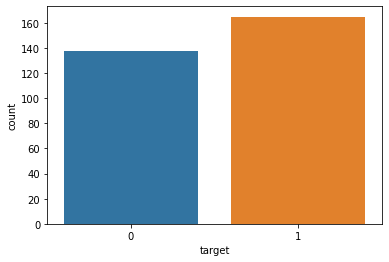

In [2]:
CSVFeedData = pd.read_csv("heart.csv")
type(CSVFeedData)
y = CSVFeedData["target"]


sns.countplot(y)

target_temp = CSVFeedData.target.value_counts()

print(target_temp)


In [3]:
predictors = CSVFeedData.drop("target",axis=1)
target = CSVFeedData["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.40,random_state=0)


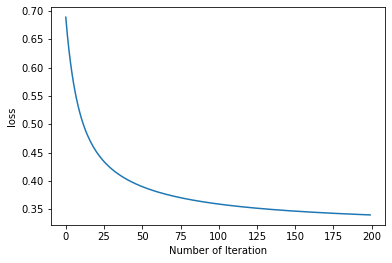

Test Accuracy of Logistic regression from scratch: 80.22%
The accuracy score achieved using Logistic Regression model from sklearn is: 78.02 %


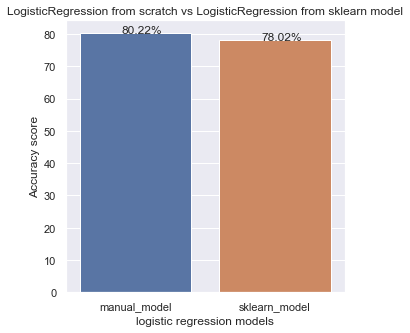

In [4]:
# Logestic Regression


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(weight, bias, x_test):
    z = np.dot(weight.T, x_test.T) + bias
    y_calculated = sigmoid(z)

    y_prediction = np.zeros((1, x_test.shape[0]))

    for i in range(y_calculated.shape[1]):
        if y_calculated[0, i] < 0.5:
            y_prediction[0, i] = 0
        else:
            y_prediction[0, i] = 1

    return y_prediction

def LogisticRegression_train(weights, bias, x_train, y_train, learning_Rate, epochs):
    
    loss_list = []
    epoch_list = []

    for i in range(epochs):
        # forward
        y_calculated = sigmoid(np.dot(weights.T, x_train.T) + bias)
        
        lw = -(y_train * np.log(y_calculated) + (1 - y_train) * np.log(1 - y_calculated))
        """print("i= ", i)
        print("sum = ",np.sum(lw))"""
        
        loss = np.sum(lw) / x_train.shape[0]

        # Backward
        MLE_update = np.dot(x_train.T, ((y_calculated - y_train.T).T)) / x_train.shape[0]
        
        weights = weights - learning_Rate * MLE_update

        loss_list.append(loss)
        epoch_list.append(i)
        
        x_train, y_train = shuffle(x_train, y_train)
        

    plt.plot(epoch_list, loss_list)
    plt.xlabel("Number of Iteration")
    plt.ylabel("loss")
    plt.show()

    return weights, bias

def logistic_regression(x_train, y_train, x_test, y_test, learningRate, epochs):
    # random weights [-0.05, 0.05] --> size = n_features (13)
    global score_manual
    weights = np.random.uniform(-0.05, 0.05, (x_train.shape[1], 1))
    
    bias = 0.0
    weights, bias = LogisticRegression_train(weights, bias, x_train, y_train, learningRate, epochs)
    y_prediction = predict(weights, bias, x_test)
    
    print("Test Accuracy of Logistic regression from scratch: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test)) * 100) / 100 * 100))
    score_manual = round((100 - np.mean(np.abs(y_prediction - y_test)) * 100) / 100 * 100, 2)

score_manual = 0

# read data
data = pd.read_csv("heart.csv")

# store x and y values
y_true = data.target.values
x_data = data.drop(['target'], axis = 1)

# Normalize
x_data = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

# split the data 60% training and 40% testing
x_train, x_test, y_train, y_test = train_test_split(x_data, y_true, test_size = 0.30, random_state=4)


logistic_regression(x_train, y_train, x_test, y_test, learningRate=1, epochs=200)

# sklearn model
lr = LogisticRegression()
lr.fit(x_train,y_train)
Y_pred_lr = lr.predict(x_test)
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression model from sklearn is: "+str(score_lr)+" %")

sns.set(rc={'figure.figsize':(5,5)})
plt.xlabel("logistic regression models")
plt.ylabel("Accuracy score")
plt.title("LogisticRegression from scratch vs LogisticRegression from sklearn model")
models = ["manual_model", "sklearn_model"]
scores = [score_manual, score_lr]
ax=sns.barplot(models,scores)

i = 0
for p in ax.patches:
        #percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + 0.3
        y = p.get_y() + p.get_height() +0.1
        ax.annotate(str(scores[i])+"%", (x, y))
        i = i+1

plt.show()

In [5]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


model.fit(X_train,Y_train,epochs=100)

Y_pred_nn = model.predict(X_test)
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")


Epoch 1/300
6/6 [==============================] - 1s 4ms/step - loss: 17.8100 - accuracy: 0.4365
Epoch 2/300
6/6 [==============================] - 0s 3ms/step - loss: 11.6807 - accuracy: 0.4365
Epoch 3/300
6/6 [==============================] - 0s 4ms/step - loss: 5.7417 - accuracy: 0.4365
Epoch 4/300
6/6 [==============================] - 0s 4ms/step - loss: 1.8130 - accuracy: 0.4751
Epoch 5/300
6/6 [==============================] - 0s 4ms/step - loss: 2.9505 - accuracy: 0.5359
Epoch 6/300
6/6 [==============================] - 0s 5ms/step - loss: 2.4622 - accuracy: 0.5525
Epoch 7/300
6/6 [==============================] - 0s 5ms/step - loss: 1.3944 - accuracy: 0.4475
Epoch 8/300
6/6 [==============================] - 0s 4ms/step - loss: 1.7253 - accuracy: 0.4199
Epoch 9/300
6/6 [==============================] - 0s 5ms/step - loss: 1.2955 - accuracy: 0.4199
Epoch 10/300
6/6 [==============================] - 0s 4ms/step - loss: 1.2089 - accuracy: 0.5193
Epoch 11/300
6/6 [=========

6/6 [==============================] - 0s 3ms/step - loss: 0.3936 - accuracy: 0.8343
Epoch 85/300
6/6 [==============================] - 0s 1ms/step - loss: 0.3992 - accuracy: 0.8232
Epoch 86/300
6/6 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8343
Epoch 87/300
6/6 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8398
Epoch 88/300
6/6 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.8343
Epoch 89/300
6/6 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.8343
Epoch 90/300
6/6 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8287
Epoch 91/300
6/6 [==============================] - 0s 3ms/step - loss: 0.3883 - accuracy: 0.8453
Epoch 92/300
6/6 [==============================] - 0s 4ms/step - loss: 0.3841 - accuracy: 0.8619
Epoch 93/300
6/6 [==============================] - 0s 5ms/step - loss: 0.3871 - accuracy: 0.8343
Epoch 94/300
6/6 [===============

6/6 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8895
Epoch 167/300
6/6 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.8619
Epoch 168/300
6/6 [==============================] - 0s 3ms/step - loss: 0.3432 - accuracy: 0.8729
Epoch 169/300
6/6 [==============================] - 0s 2ms/step - loss: 0.3302 - accuracy: 0.8564
Epoch 170/300
6/6 [==============================] - 0s 3ms/step - loss: 0.3278 - accuracy: 0.8895
Epoch 171/300
6/6 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.8840
Epoch 172/300
6/6 [==============================] - 0s 3ms/step - loss: 0.3363 - accuracy: 0.8508
Epoch 173/300
6/6 [==============================] - 0s 4ms/step - loss: 0.3247 - accuracy: 0.8950
Epoch 174/300
6/6 [==============================] - 0s 3ms/step - loss: 0.3373 - accuracy: 0.8729
Epoch 175/300
6/6 [==============================] - 0s 3ms/step - loss: 0.3438 - accuracy: 0.8398
Epoch 176/300
6/6 [=====

6/6 [==============================] - 0s 3ms/step - loss: 0.3130 - accuracy: 0.8950
Epoch 249/300
6/6 [==============================] - 0s 3ms/step - loss: 0.3032 - accuracy: 0.8895
Epoch 250/300
6/6 [==============================] - 0s 4ms/step - loss: 0.3114 - accuracy: 0.8785
Epoch 251/300
6/6 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.9006
Epoch 252/300
6/6 [==============================] - 0s 3ms/step - loss: 0.3074 - accuracy: 0.8840
Epoch 253/300
6/6 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.8895
Epoch 254/300
6/6 [==============================] - 0s 2ms/step - loss: 0.3078 - accuracy: 0.8508
Epoch 255/300
6/6 [==============================] - 0s 3ms/step - loss: 0.3247 - accuracy: 0.8785
Epoch 256/300
6/6 [==============================] - 0s 3ms/step - loss: 0.3041 - accuracy: 0.8674
Epoch 257/300
6/6 [==============================] - 0s 5ms/step - loss: 0.3136 - accuracy: 0.8950
Epoch 258/300
6/6 [=====

In [6]:
# SVM
sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")


The accuracy score achieved using Linear SVM is: 80.33 %


In [7]:
# Naive Bayse
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 79.51 %


In [8]:
scores = [score_manual,score_nb,score_svm,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")


The accuracy score achieved using Logistic Regression is: 80.22 %
The accuracy score achieved using Naive Bayes is: 79.51 %
The accuracy score achieved using Support Vector Machine is: 80.33 %
The accuracy score achieved using Neural Network is: 77.87 %


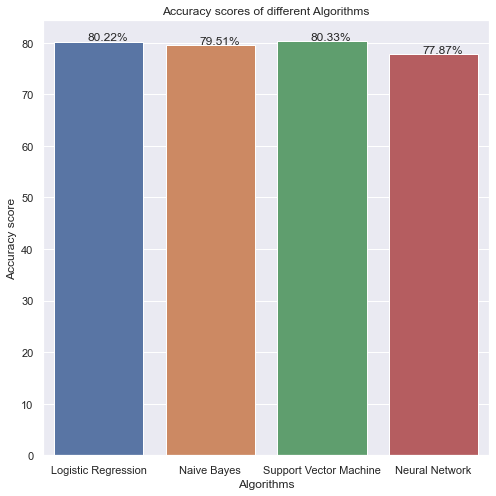

In [9]:
sns.set(rc={'figure.figsize':(8,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.title("Accuracy scores of different Algorithms")

ax = sns.barplot(algorithms,scores)



i = 0
for p in ax.patches:
        #percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + 0.3
        y = p.get_y() + p.get_height() + 0.2
        ax.annotate(str(scores[i])+"%", (x, y))
        i = i+1

plt.show()
